In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science','notebook','grid'])
import sympy as sp
import random
from IPython.display import display, Math
import pandas as pd
from scipy.special import erfc 
from IPython.core.display import Latex
from sympy import *
import iminuit
from iminuit import cost
from iminuit import Minuit
from scipy.stats import chi2
from scipy.stats import binom
    

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

# Problem 1

### Problem 1.1.1

In [2]:
N_exp = 100000

N_coin = 20
N_shoot = 2500
p_hit = 0.004

#Doing it for the coin flip
N1_array = np.zeros(N_exp)
N2_array = np.zeros(N_exp)

for i in range(N_exp):
    N1_array[i] = np.sum(np.random.randint(0, 2, N_coin) == 0)

    N2_array[i] = np.sum(np.random.random(N_shoot) <= p_hit)

P_N1_greater_than_N2 = np.mean(N1_array > N2_array)
P_N1_greater_than_N2_err = np.std(N1_array > N2_array, ddof = 1) / np.sqrt(N_exp)

P_N2_greater_than_N1 = np.mean(N2_array > N1_array)
P_N2_greater_than_N1_err = np.std(N2_array > N1_array, ddof = 1) / np.sqrt(N_exp)

print(f'P(N1>N2) = {P_N1_greater_than_N2:.3f} +- {P_N1_greater_than_N2_err:.3f}')
print(f'P(N2>N1) = {P_N2_greater_than_N1:.3f} +- {P_N2_greater_than_N1_err:.3f}')

P(N1>N2) = 0.460 +- 0.002
P(N2>N1) = 0.437 +- 0.002


### Problem 1.1.2

In [3]:
P_25_250_N2     = np.mean((N2_array >= 25) & (N2_array <= 250))
P_25_250_N2_err = np.std((N2_array >= 25) & (N2_array <= 250), ddof = 1) / np.sqrt(N_exp)

print(f'P(25<= N2 <= 250) = {P_25_250_N2} +- {P_25_250_N2_err}')
print(f'P(25<= N2 <= 250) Theory =', binom.cdf(250, N_shoot, p_hit) - binom.cdf(24, N_shoot, p_hit))

P(25<= N2 <= 250) = 6e-05 +- 2.4494285041617296e-05
P(25<= N2 <= 250) Theory = 4.493315896603178e-05


### Problem 1.1.3

In [4]:
P_10_N1     = np.mean((N1_array == 10))
P_10_N1_err = np.std((N1_array == 10), ddof = 1) / np.sqrt(N_exp)

P_10_N2     = np.mean((N2_array == 10))
P_10_N2_err = np.std((N2_array == 10), ddof = 1) / np.sqrt(N_exp)

P_20_N1     = np.mean((N1_array == 20))
P_20_N1_err = np.std((N1_array == 20), ddof = 1) / np.sqrt(N_exp)

P_20_N2     = np.mean((N2_array == 20))
P_20_N2_err = np.std((N2_array == 20), ddof = 1) / np.sqrt(N_exp)

print(f'P(N1 = 10) = {P_10_N1} +- {P_10_N1_err}')
print(f'P(N1 = 10) Theory =', binom.pmf(10, N_coin, 0.5))

print(f'P(N2 = 10) = {P_10_N2} +- {P_10_N2_err}')
print(f'P(N2 = 10) Theory =', binom.pmf(10, N_shoot, p_hit))

print(f'P(N1 = 20) = {P_20_N1} +- {P_20_N1_err}')
print(f'P(N1 = 20) Theory =', binom.pmf(20, N_coin, 0.5))

print(f'P(N2 = 20) = {P_20_N2} +- {P_20_N2_err}')
print(f'P(N2 = 20) Theory =', binom.pmf(20, N_shoot, p_hit))

P(N1 = 10) = 0.17611 +- 0.0012045609941683678
P(N1 = 10) Theory = 0.1761970520019531
P(N2 = 10) = 0.12505 +- 0.0010460095202048417
P(N2 = 10) Theory = 0.12536099218185245
P(N1 = 20) = 0.0 +- 0.0
P(N1 = 20) Theory = 9.5367431640625e-07
P(N2 = 20) = 0.00179 +- 0.00013367175349106783
P(N2 = 20) Theory = 0.0018362936848229186


# Problem 2

### Problem 2.1.1

In [5]:
mu_x, mu_y      = 1.71, 10.1
sig_x, sig_y    = 0.05, 0.3

z, x, y = symbols("z, x, y")
dz, dx, dy = symbols("dz, sigma_x, sigma_y")

z = sp.cos(x**2) / sp.ln(x*y)
lprint(latex(Eq(symbols('z'), z)))

dz = sqrt((z.diff(x)*dx)**2 + (z.diff(y)*dy)**2)
lprint(latex(Eq(symbols('sigma_z'), dz)))

fz = lambdify((x,y), z)
fdz = lambdify((x, dx, y, dy), dz)

vz = fz(mu_x, mu_y)
vdz = fdz(mu_x, sig_x, mu_y, sig_y)
lprint(fr'z = {vz:.6f} \pm {vdz:.6f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.1.2

In [6]:
rho = symbols("rho_xy")

dz_corr = sqrt((z.diff(x)*dx)**2 + (z.diff(y)*dy)**2 + 2*rho*z.diff(x)*z.diff(y)*dx*dy)

lprint(latex(Eq(symbols('sigma_z'), dz_corr)))

fdz_corr = lambdify((x, dx, y, dy, rho), dz_corr)

vdz_corr = fdz_corr(mu_x, sig_x, mu_y, sig_y, 0.87)
lprint(fr'z = {vz:.3f} \pm {vdz_corr:.3f}')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.2.1

In [7]:
df = pd.read_csv('data_WaterDensity.csv', header=0)
temp, density = df.values.T
df
temp

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
       2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
       2.3, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9,
       3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 5.9, 5.9, 5.9, 5.9, 5.9,
       5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9,
       5.9, 5.9, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8,
       7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8])

In [8]:
density1 = density[:20]
density2 = density[20:40]
density3 = density[40:60]
density4 = density[60:80]
density5 = density[80:100]

densities = [density1, density2, density3, density4, density5]

for i, dens in enumerate(densities, start = 1):
    mean    = np.mean(dens)
    err     = np.std(dens, ddof = 1) / np.sqrt(len(dens))
    print(f"Temperature {i}: {mean:.6f} +- {err:.6f}")

Temperature 1: 0.999855 +- 0.000003
Temperature 2: 0.999952 +- 0.000003
Temperature 3: 0.999972 +- 0.000003
Temperature 4: 0.999951 +- 0.000004
Temperature 5: 0.999865 +- 0.000004


### Problem 2.2.2

In [9]:
from scipy.special import erfc

def chauvenet(y):
    mean = np.mean(y)
    std  = np.std(y, ddof = 1)
    N = len(y)
    criterion = 1/(2*N)

    d = np.abs(y - mean) / std
    d /= np.sqrt(2)
    prob = erfc(d)

    return prob >= criterion

for i, dens in enumerate(densities, start=1):
    y = dens.copy()
    excluded = []

    while True:
        mask = chauvenet(y)
        if mask.all():
            break
        excluded.extend(y[~mask])
        y = y[mask]

    mean = np.mean(y)
    err  = np.std(y, ddof=1) / np.sqrt(len(y))

    print(f"Temperature {i}")
    print(f"Excluded measurements:")
    for val in excluded:
        print(f"  {val:.8f}")

    print(f"Final result: {mean:.8f} ± {err:.8f}  (N={len(y)})")


Temperature 1
Excluded measurements:
  0.99989390
  0.99983280
  0.99983200
  0.99986720
  0.99984680
  0.99985080
Final result: 0.99985574 ± 0.00000037  (N=14)
Temperature 2
Excluded measurements:
  0.99991160
  0.99999600
  0.99995760
Final result: 0.99995184 ± 0.00000050  (N=17)
Temperature 3
Excluded measurements:
  0.99991820
  0.99996970
Final result: 0.99997518 ± 0.00000037  (N=18)
Temperature 4
Excluded measurements:
  1.00001430
  0.99998090
  0.99996510
  0.99992630
Final result: 0.99994621 ± 0.00000043  (N=16)
Temperature 5
Excluded measurements:
  0.99980540
  0.99991170
  0.99989690
  0.99986810
Final result: 0.99986354 ± 0.00000040  (N=16)


### Problem 2.2.3

In [10]:
densities_cleaned = []

for dens in densities:
    y = dens.copy()
    while True:
        mask = chauvenet(y)
        if mask.all():
            break
        y = y[mask]
    densities_cleaned.append(y)

means   = np.array([np.mean(dens) for dens in densities_cleaned])
sems    = np.array([np.std(dens, ddof = 1) / np.sqrt(len(dens)) for dens in densities_cleaned])

dens_max = np.argmax(means)

for i in range(len(means)):
    if i == dens_max:
        continue

    difference  = means[dens_max] - means[i]
    sigma       = np.sqrt(sems[dens_max]**2 + sems[i]**2)
    significance = difference / sigma

    print(f"T{dens_max+1} vs T{i+1}: z = {significance}")

T3 vs T1: z = 226.45822271189607
T3 vs T2: z = 37.39394659462612
T3 vs T4: z = 50.74534397237046
T3 vs T5: z = 203.5212488272224


### Problem 2.2.4

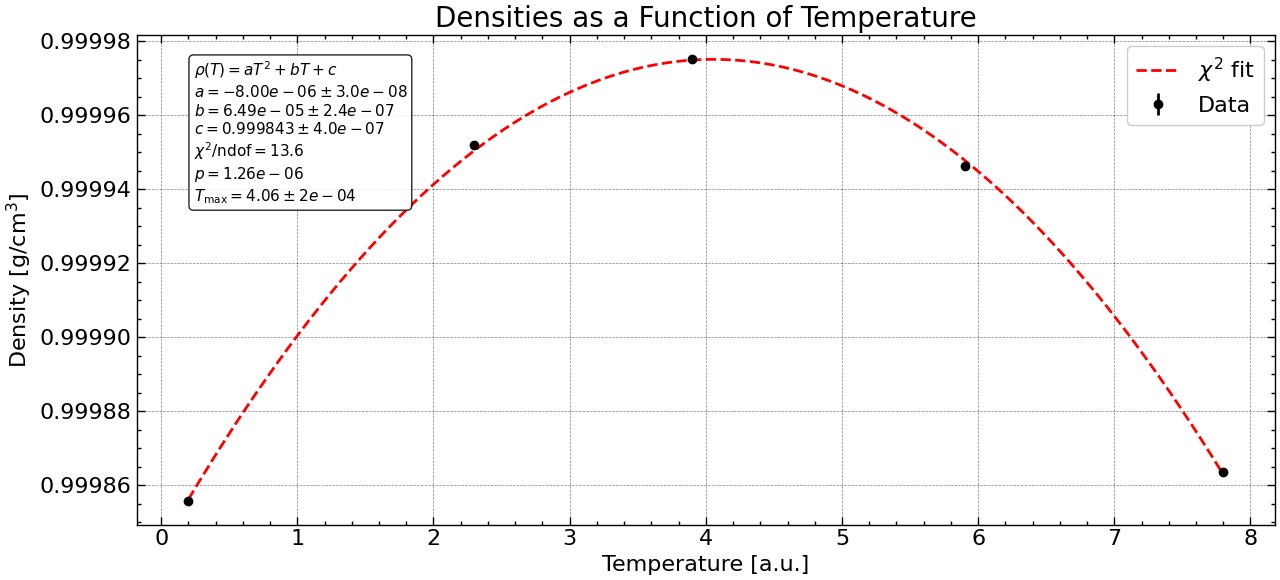

In [23]:
temperature_list = list(set(temp))

def quardratic(T, a, b, c):
    return a*T**2 + b*T + c

cfit = cost.LeastSquares(temperature_list, means, sems, quardratic)
m = Minuit(cfit, a = -1e-6, b = 0, c = 1)
m.migrad()
m.hesse()

a, b, c             = m.values["a"], m.values["b"], m.values["c"]
a_err, b_err, c_err = m.errors["a"], m.errors["b"], m.errors["c"]
chi2_value          = m.fval
ndof                = len(temperature_list) - m.nfit
p_value             = chi2.sf(chi2_value, ndof)
T_max               = -b / (2*a)
T_fit               = np.linspace(min(temperature_list), max(temperature_list), 500)
density_fit         = a*T_fit**2 + b*T_fit + c

textstr = (
    r"$\rho(T)=aT^2+bT+c$" "\n"
    rf"$a = {a:.2e} \pm {a_err:.1e}$" "\n"
    rf"$b = {b:.2e} \pm {b_err:.1e}$" "\n"
    rf"$c = {c:.6f} \pm {c_err:.1e}$" "\n"
    rf"$\chi^2/\mathrm{{ndof}} = {chi2_value/ndof:.1f}$" "\n"
    rf"$p = {p_value:.2e}$" "\n"
    rf"$T_{{\max}} = {T_max:.2f} \pm {b_err**2/(4*a**2) + b**2 * a_err**2 / (4*a**2):.0e}$"
)


plt.figure(figsize = (13,6))
plt.plot(T_fit, density_fit, '--', color = 'red', label = r'$\chi^2$ fit')
plt.errorbar(temperature_list, means, yerr = sems, fmt = 'o', color = 'black', label = 'Data')
plt.title('Densities as a Function of Temperature', fontsize = 20)
plt.xlabel('Temperature [a.u.]')
plt.ylabel(r'Density [g/cm$^3$]')
plt.legend()

plt.text(
    0.05, 0.95, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.85)
)
plt.tight_layout()
#plt.savefig('Problem 2.2.4.png', dpi = 300)

### Problem 2.3.1

In [27]:
mu_beta      = 0.5
sig_beta     = 0.02

gamma, beta = symbols("gamma, beta")
dgamma, dbeta = symbols("sigma_gamma, sigma_beta")

gamma = 1/(sqrt(1-beta**2))
lprint(latex(Eq(symbols('gamma'), gamma)))

dgamma = sqrt((gamma.diff(beta)*dbeta)**2)
lprint(latex(Eq(symbols('sigma_gamma'), dgamma)))

fgamma = lambdify((beta), gamma)
fdgamma = lambdify((beta, dbeta), dgamma)

vgamma = fgamma(mu_beta)
vdgamma = fdgamma(mu_beta, sig_beta)
lprint(fr'gamma = {vgamma:.6f} \pm {vdgamma:.6f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.3.2

In [40]:
mu_beta      = 0.95
sig_beta     = 0.02

gamma, beta = symbols("gamma, beta")
dgamma, dbeta = symbols("sigma_gamma, sigma_beta")

gamma = 1/(sqrt(1-beta**2))
lprint(latex(Eq(symbols('gamma'), gamma)))

dgamma = sqrt((gamma.diff(beta)*dbeta)**2)
lprint(latex(Eq(symbols('sigma_gamma'), dgamma)))

fgamma = lambdify((beta), gamma)
fdgamma = lambdify((beta, dbeta), dgamma)

vgamma = fgamma(mu_beta)
vdgamma = fdgamma(mu_beta, sig_beta)
lprint(fr'gamma = {vgamma:.6f} \pm {vdgamma:.6f}')

vgamma_low = fgamma(0.93)
vgamma_high = fgamma(0.97)
lprint(fr'gamma low = {vgamma:.6f} - {vgamma-vgamma_low:.6f}')
lprint(fr'gamma high = {vgamma:.6f} + {vgamma_high - vgamma:.6f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>